# **K Nearest Neighbors: 50 Points**

K-Nearest Neighbors (KNN) is a supervised learning algorithm used for both classification and regression tasks. It doesn't learn parameters or rules like other methods, but instead predicts outputs based on the similarity of inputs. In classification, a new instance is assigned the most common class among its 'K' closest instances from the training data. In regression, it's assigned the average value of the 'K' nearest instances. The choice of 'K' and proper scaling of input features are crucial for optimal results.

**Importing all the required libraries.**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
import numpy as np

**Importing Dataset**

We are going to be using the wine toy dataset from SciKit Learn

In [38]:
from sklearn.datasets import load_wine
wine_data = load_wine()

**Data Processing**

**TODO: Split the Dataset (5 Points)**


In [39]:
def data_processing(wine_data):
    # Split the dataset into training set and temporary set using 80-20 split, use random_state = 0
    ##### INPUT CODE HERE (~1 line of code) ######
    temp_1, X_temp, temp_2, y_temp = train_test_split(wine_data.data, wine_data.target, test_size=0.2, random_state=0)

    ##############################################

    # Split the temporary set into validation set and test set using 50-50 split, use random_state = 0
    ##### INPUT CODE HERE (~1 line of code) ######
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

    ##############################################
    

    # Convert all datasets into numpy arrays
    X_train = np.array(temp_1)
    X_val = np.array(X_val)
    X_test = np.array(X_test)

    y_train = np.array(temp_2)
    y_val = np.array(y_val)
    y_test = np.array(y_test)

    return X_train, y_train, X_val, y_val, X_test, y_test

**Data Processing With Transformations (MinMax and Normalization)**  
**TODO: Add MinMax and Normalization Code (5 Points)**

In [40]:
def data_processing_with_transformation(wine_data, do_minmax_scaling=True, do_normalization=False):
    # Split the dataset into training set and temporary set using 80-20 split, use random_state = 0
    ##### INPUT CODE HERE (~1 line of code) ######
    temp_1, X_temp, temp_2, y_temp = train_test_split(wine_data.data, wine_data.target, test_size=0.2, random_state=0)

    ##############################################
    

    # Split the temporary set into validation set and test set using 50-50 split, use random_state = 0
    ##### INPUT CODE HERE (~1 line of code) ######
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

    ##############################################
    

    # Convert all datasets into numpy arrays
    X_train = np.array(temp_1)
    X_val = np.array(X_val)
    X_test = np.array(X_test)

    y_train = np.array(y_temp)
    y_val = np.array(y_val)
    y_test = np.array(y_test)

    # Min-Max scaling
    if do_minmax_scaling:
        #####################################################
        #             YOUR CODE HERE                        #
        #####################################################
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)

    # Normalization
    if do_normalization:
        #####################################################
        #             YOUR CODE HERE                        #
        #####################################################
        normalizer = Normalizer()
        X_train = normalizer.fit_transform(X_train)
        X_val = normalizer.transform(X_val)
        X_test = normalizer.transform(X_test)

    return X_train, y_train, X_val, y_val, X_test, y_test

**TODO: Complete compute_l2_distances( ) function  (10 Points)**

The L2 distance, also known as the Euclidean distance, is a measure of the straight line distance between two points in a space. It is commonly used in machine learning to compute the similarity between vectors.  

The L2 distance, or Euclidean distance, between two vectors `x` and `x'` is given by:

$$
d(x, x') = \left\| x - x' \right\|_2 = \sqrt{\sum_{i} (x_i - x'_i)^2}
$$

Where:

- $d(x, x')$ is the L2 distance between vectors `x` and `x'`
- $x_i$ is the ith element of vector `x`
- $x'_i$ is the ith element of vector `x'`
- The sum is over all elements of the vectors

The square root of the sum of the squared differences of the corresponding elements of the vectors gives the L2 distance.

In [41]:
def compute_l2_distances(Xtrain, X):
    """
    Compute the distance between each test point in X and each training point
    in Xtrain.
    Inputs:
    - Xtrain: A numpy array of shape (num_train, D) containing training data
    - X: A numpy array of shape (num_test, D) containing test data.
    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    #####################################################
    #             YOUR CODE HERE                        #
    #####################################################

    num_test = X.shape[0]
    num_train = Xtrain.shape[0]
    dists = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            # Compute the Euclidean distance between test point i and training point j
            dists[i, j] = np.sqrt(np.sum((X[i] - Xtrain[j])**2))



    return dists

:**TODO: Complete compute_cosine_distances( ) function  (10 Points)**

Cosine distance is a measure of dissimilarity between two vectors that goes from 0 to 2. It is derived from the cosine similarity measure, which calculates the cosine of the angle between two vectors.

The cosine distance between two vectors `x` and `x'` is given by:

$$
d(x, x') = 
\begin{cases} 
1 & \text{if } \|x\|_2 = 0 \text{ or } \|x'\|_2 = 0 \\
1 - \frac{x \cdot x'}{\|x\|_2 \|x'\|_2} & \text{otherwise}
\end{cases}
$$

Where:

- $d(x, x')$ is the cosine distance between vectors `x` and `x'`
- $x \cdot x'$ is the dot product of vectors `x` and `x'`
- $\|x\|_2$ and $\|x'\|_2$ are the L2 norms (or magnitudes) of the vectors `x` and `x'`
- The condition checks if either norm is zero. If so, it returns 1, otherwise it calculates the cosine distance.


In [42]:
def compute_cosine_distances(Xtrain, X):
    """
    Compute the distance between each test point in X and each training point
    in Xtrain.
    Inputs:
    - Xtrain: A numpy array of shape (num_train, D) containing training data
    - X: A numpy array of shape (num_test, D) containing test data.
    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Cosine distance between the ith test point and the jth training
      point.
    """
    #####################################################
    #             YOUR CODE HERE                        #
    #####################################################
    
    num_test = X.shape[0]
    num_train = Xtrain.shape[0]
    dists = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            # Compute the dot product of test point i and training point j
            dot_product = np.dot(X[i], Xtrain[j])

            # Compute the L2 norms of the vectors x and x'
            norm_x = np.linalg.norm(X[i])
            norm_x_prime = np.linalg.norm(Xtrain[j])

            # Compute the cosine distance
            if norm_x == 0 or norm_x_prime == 0:
                dists[i, j] = 1
            else:
                dists[i, j] = 1 - dot_product / (norm_x * norm_x_prime)

    return dists

**TODO: Complete predict_labels( ) function (5 Points)**

In [43]:
def predict_labels(k, ytrain, dists):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.
    Inputs:
    - k: The number of nearest neighbors used for prediction.
    - ytrain: A numpy array of shape (num_train,) where ytrain[i] is the label
      of the ith training point.
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.
    Returns:
    - ypred: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].
    """
    #####################################################
    #             YOUR CODE HERE                        #
    #####################################################
    num_test = dists.shape[0]
    ypred = np.zeros(num_test)

    for i in range(num_test):
        # Sort the distances for the current test point and get the indices of the k nearest neighbors
        nearest_indices = np.argsort(dists[i])[:k]

        # Get the labels of the k nearest neighbors
        nearest_labels = ytrain[nearest_indices % len(ytrain)]
        
        # Count the occurrences of each label
        label_counts = np.bincount(nearest_labels)

        # Find the label with the maximum count
        max_count_label = np.argmax(label_counts)

        # Assign the predicted label for the current test point
        ypred[i] = max_count_label

    return ypred

**TODO: Complete compute_error_rate( ) function (5 Points)**

In [44]:
def compute_error_rate(y, ypred):
    """
    Compute the error rate of prediction based on the true labels.
    Inputs:
    - y: A numpy array with of shape (num_test,) where y[i] is the true label
      of the ith test point.
    - ypred: A numpy array with of shape (num_test,) where ypred[i] is the
      prediction of the ith test point.
    Returns:
    - err: The error rate of prediction (scalar).
    """
    #####################################################
    #             YOUR CODE HERE                        #
    #####################################################
    num_test = y.shape[0]
    err = np.sum(y != ypred) / num_test

    return err

**TODO: Complete find_best_k( ) function (10 Points)**

In [45]:
def find_best_k(K, ytrain, dists, yval):
    """
    Find best k according to validation error rate.
    Inputs:
    - K: A list of ks.
    - ytrain: A numpy array of shape (num_train,) where ytrain[i] is the label
      of the ith training point.
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the distance between the ith test point and the jth training
      point.
    - yval: A numpy array with of shape (num_val,) where y[i] is the true label
      of the ith validation point.**TODO**: Complete compute_l2_distances( ) function
    Returns:
    - best_k: The k with the lowest error rate.
    - validation_error: A list of error rate of different ks in K.
    - best_err: The lowest error rate we get from all ks in K.
    """
    #####################################################
    #             YOUR CODE HERE                        #
    #####################################################

    best_k = None
    validation_error = []
    best_err = float('inf')

    for k in K:
        # Predict labels for the validation set
        ypred_val = predict_labels(k, ytrain, dists)

        # Compute the error rate for the current k
        err = compute_error_rate(yval, ypred_val)

        # Update the best k and best error rate if necessary
        if err < best_err:
            best_k = k
            best_err = err

        # Store the validation error for the current k
        validation_error.append(err)
        
    return best_k, validation_error, best_err

### Report 4-nearest neighbor accuracy

**Task**: Fill in the code for the function compute l2 distances .  
**Task**: Fill in the code for the function predict labels .

**Report Item**: Report the error rate of your k nearest neighbor algorithm in the validation set when k = 4 using
Euclidean distance.

In [46]:
#==================Problem Set 1.1=======================
data = load_wine()
output_file = 'knn_output.txt'
# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(data)

dists = compute_l2_distances(Xtrain, Xval)

# Compute validation accuracy when k=4
k = 4
ypred = predict_labels(k, ytrain, dists)
err = compute_error_rate(yval, ypred)
print("The validation error rate is", err, "in Problem Set 1.1")
print()

The validation error rate is 0.16666666666666666 in Problem Set 1.1



###  Data transformation

**Task**: Fill in the code for the function data processing with transformation .

**Report Item**: Report the error rate of your k nearest neighbor algorithm in the validation set for k = 4 using Euclidean distance when data is using (1) Normalized featured vector, and (2) Min-max scaling featured vector.

In [47]:
#==================Problem Set 1.2=======================

# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(data, do_minmax_scaling=False, do_normalization=True)

dists = compute_l2_distances(Xtrain, Xval)

# Compute validation accuracy when k=4
k = 4
ypred = predict_labels(k, ytrain, dists)
err = compute_error_rate(yval, ypred)
print("The validation error rate is", err, "in Problem Set 1.2 when using normalization")
print()

# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(data, do_minmax_scaling=True, do_normalization=False)

dists = compute_l2_distances(Xtrain, Xval)

# Compute validation accuracy when k=4
k = 4
ypred = predict_labels(k, ytrain, dists)
err = compute_error_rate(yval, ypred)
print("The validation error rate is", err, "in Problem Set 1.2 when using minmax_scaling")
print()



The validation error rate is 0.6111111111111112 in Problem Set 1.2 when using normalization

The validation error rate is 0.7777777777777778 in Problem Set 1.2 when using minmax_scaling



### Different distance measurement

**Task**: Fill in the code for the function compute cosine distances and change distance function used in the main func- tion in the code to get results.

**Report Item**: Report the error rate of your k nearest neighbor algorithm in the validation set for k = 4 using cosine distance for original data.

In [48]:
#==================Problem Set 1.3=======================

# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(data)
dists = compute_cosine_distances(Xtrain, Xval)

# Compute validation accuracy when k=4
k = 4
ypred = predict_labels(k, ytrain, dists)
err = compute_error_rate(yval, ypred)
print("The validation error rate is", err, "in Problem Set 1.3, which use cosine distance")
print()

The validation error rate is 0.05555555555555555 in Problem Set 1.3, which use cosine distance



### Tuning the hyper-parameter k 

**Task**: Fill in the code for the function find best k .

**Report Item**: 
1. Report and draw a curve based on the error rate of your model on the training set for each k. What do you observe?
2. Report and draw a curve based on the error rate of your model on the validation set for each k. What is your best k?   
3. What do you observe by comparing the difference between the two curves?
4. What’s the final test set error rate you get using your best-k? 
5. Comment on these results.

In [49]:

#==================Problem Set 1.4=======================
# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(data)

#======performance of different k in training set=====
K = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]

dists = compute_l2_distances(Xtrain, Xtrain)
best_k, training_error, best_err = find_best_k(K, ytrain, dists, ytrain)

#==========select the best k by using validation set==============
dists = compute_l2_distances(Xtrain, Xval)
best_k, validation_error, best_err = find_best_k(K, ytrain, dists, yval)

#===============test the performance with your best k=============
dists = compute_l2_distances(Xtrain, Xtest)
ypred = predict_labels(best_k, ytrain, dists)
test_err = compute_error_rate(ytest, ypred)
print("In Problem Set 1.4, we use the best k = ", best_k, "with the best validation error rate", best_err)
print("Using the best k, the final test error rate is", test_err)

In Problem Set 1.4, we use the best k =  1 with the best validation error rate 0.1111111111111111
Using the best k, the final test error rate is 0.3333333333333333


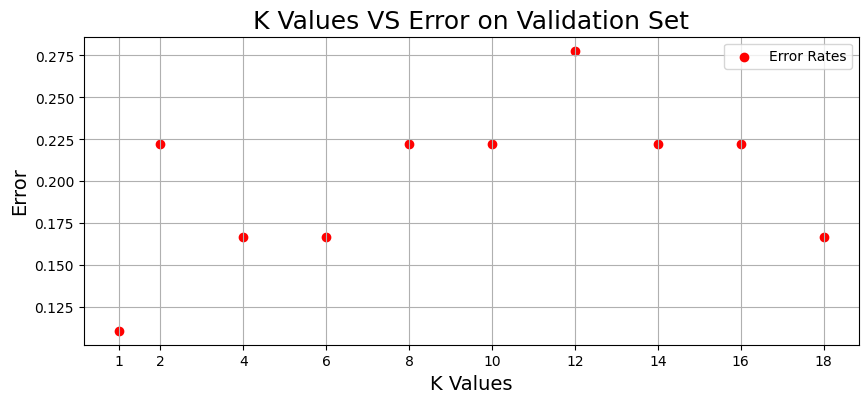

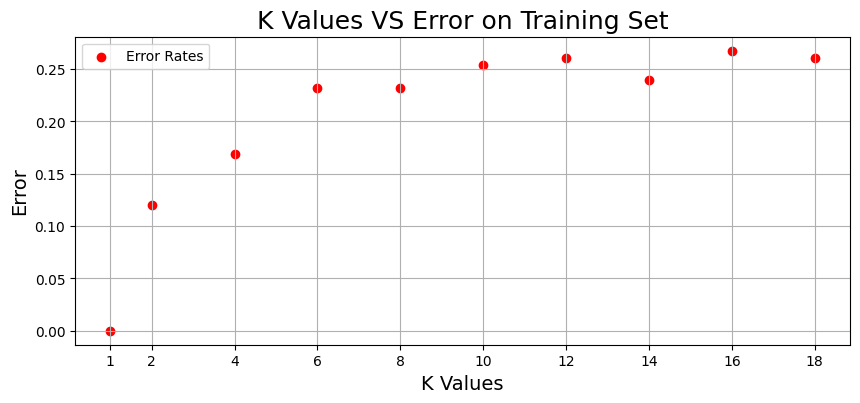

In [50]:
#====================write your results to file===================
f=open(output_file, 'w')
for i in range(len(K)):
    f.write('%d %.3f' % (K[i], validation_error[i])+'\n')
f.write('%s %.3f' % ('test', test_err))
f.close()
plt.figure(figsize=(10,4))
plt.scatter(K, validation_error, color='red', label = 'Error Rates')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('K Values', fontsize = 14)
plt.title('K Values VS Error on Validation Set', fontsize = 18)
plt.xticks(K)
plt.legend()
plt.grid()
plt.savefig("Error_Rate_On_Validation_Set.png")
plt.figure(figsize=(10,4))
plt.scatter(K, training_error, color='red', label = 'Error Rates')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('K Values', fontsize = 14)
plt.title('K Values VS Error on Training Set', fontsize = 18)
plt.xticks(K)
plt.legend()
plt.grid()
plt.savefig("Error_Rate_On_Training_Set.png")

# **Decision Tree Classification: 10 Points**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

**STEP 1: Importing all the required libraries.**

In [51]:
# Libraries for data analysis
import numpy as np # For large multi-dimensional array and matrix processing
import pandas as pd # For data extraction and preparation

#The sklearn.tree module includes decision tree-based models for classification and regression.
from sklearn import tree

# Libraries for displaying results and analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

**STEP 2: Importing Dataset**

We are going to be using the wine toy dataset from SciKit Learn

In [52]:
from sklearn.datasets import load_wine
wine_data = load_wine()

You can optionally print the Description of the dataset for your reference.

In [53]:
print(wine_data.data.shape)
print(wine_data.target.shape)
print(wine_data.DESCR)

(178, 13)
(178,)
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    

**STEP 3: Split the Dataset (2 Points)**

**TO DO:** Similar to the KNN Tutorial, split the given X and y data into X_train, X_test, y_train, y_test, using **test ratio of 0.3 and random_state = 0**.

In [54]:
X = wine_data.data
y = wine_data.target

##### Use numpy arrays ######
X_train = None
y_train = None
X_test = None
y_test = None

##### INPUT CODE HERE (~1 line of code) ######

##############################################

assert X_train.shape == (124,13)
assert y_train.shape == (124,)
assert X_test.shape == (54,13)
assert y_test.shape == (54,)

print("Size of training data= ", X_train.shape[0]," Samples")
print("Size of testing data= ", X_test.shape[0]," Samples")


AttributeError: ignored

**STEP 4: Fit model to training data (2 Points)**

**TO DO:** Create a Decision Tree object (named decision_tree) with random state 0 and max depth of 3. Fit the given decision tree to X_train and y_train data. You may use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for reference.

In [ ]:
decision_tree = None

##### INPUT CODE HERE (~1 line of code) ######

##############################################

print("Simple Visualization of the tree you created:")
print(tree.export_text(decision_tree, feature_names=wine_data.feature_names))


**STEP 5: Testing the model (2 Points)**

**TO DO:** Find target predictions by giving **X_test** input to your model and store them in **y_pred**. You may need [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) for reference.

In [ ]:
y_pred = None

##### INPUT CODE HERE (~1 line of code) ######

##############################################

**STEP 6: Visualize the Results  (4 Points)**

**TO DO:** Similar to the KNN Tutorial, plot confusion matrix, and accuracy of model predictions. Store accuracy in **acc** variable

You may need the following references:

[Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

[Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
## Make sure to save your accuracy in the variable "acc"
acc = 0
##### INPUT CODE HERE (~4 line of code) ######
# Make sure you plot the confusion matrix, i.e. once this code cell is run, it should output a 3X3 confusion matrix and accuracy #

##############################################

print('Accuracy of our model is equal to ' + str(round(acc, 2)) + ' %.')



---



# **Random Forest Regression: 15 Points**



Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

**STEP 1: Importing all the required libraries.**

In [ ]:
#The sklearn.ensemble module includes the RandomForest algorithm.
from sklearn.ensemble import RandomForestRegressor

# Libraries for calculating evaluation metrics
from sklearn.metrics import mean_squared_error

**STEP 2: Importing Dataset**

We are going to be using the California Housing dataset.
It contains 20640 samples with 8 dimensions to predict the value of a house.


In [ ]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

You can optionally print the description and a few samples from the dataset for your reference.

In [ ]:
print(housing_data.keys())
print(housing_data.data.shape)
print(housing_data.DESCR)

print(pd.DataFrame(housing_data.data)[:5])
print(pd.DataFrame(housing_data.target)[:5])


**STEP 3: Split the Dataset (3 Points)**

**TO DO:** Similar to the KNN Tutorial, split the given X and y data into X_train, X_test, y_train, y_test, using **test ratio of 0.3 and a random state of 0**.

In [ ]:
from pandas.core.common import random_state
X = housing_data.data
y = housing_data.target


##### Use numpy arrays ######
X_train = None
y_train = None
X_test = None
y_test = None


##### INPUT CODE HERE (~1 line of code) ######

##############################################

assert X_train.shape == (14448, 8)
assert y_train.shape == (14448,)
assert X_test.shape == (6192, 8)
assert y_test.shape == (6192,)

print("Size of training data= ", X_train.shape[0]," Samples")
print("Size of testing data= ", X_test.shape[0]," Samples")


**STEP 4: Fit model to training data (4 Points)**

**TO DO:** Fit the given decision tree to X_train and y_train data. You may use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for reference.

In [ ]:
model = RandomForestRegressor()

##### INPUT CODE HERE (~1 line of code) ######

##############################################

**STEP 4: Try Predicting Values**

**TO DO (optional) :** Change values of features to see changes in the predicted value of house

In [ ]:
# this is an example test case depicting how the prediction is done on a test data point.

val1 = 8.3252
val2 = 41.0
val3 = 6.984127
val4 = 1.023810
val5 = 322.0
val6 = 2.555556
val7 = 37.88
val8 = -122.23

row = [[val1, val2, val3, val4, val5, val6, val7, val8]]

# make a single prediction
yhat = model.predict(row)

print('House Value Prediction= $',yhat[0]*100000)

**STEP 5: Testing the model (4 Points)**

**TO DO:** Find target predictions by giving **X_test** input to your model and store them in **y_pred**. You may need [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) for reference.

In [ ]:
y_pred = None

##### INPUT CODE HERE (~1 line of code) ######

##############################################

**STEP 6: Visualize the Results (4 Points)**

**TO DO:** Since this is not a classification task, we cannot plot confusion matrix. Instead we ask you to find the mean square error evaluated on all the testing data and store it in **mse**.

You may need the following reference:

[Mean Square Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [ ]:
mse = None

##### INPUT CODE HERE (~1 line of code) ######

##############################################

print("Mean Squared Error = ",mse)



---



# **Hyperparameter Tuning: 5 Points**

**STEP 1: Hyperparameter Tuning (5 Points)**

**TO DO:** Given the different range of the hyper parameters, tune them using grid search to get the value of these variables to get the best model is. Make sure the grid search is run for **5 rounds** of cross validation using **negative mean squared error**. 


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [10, 50, 100], 'max_features': [4, 5, 6 ], 'max_depth': [6, 7, 8, 9]}
]

#Use Random Forests
forest_reg = RandomForestRegressor()

##############################################
# Write the code for hyperparameter tuning using Grid Search for the above parameters
# Carry out the grid search and fit the data on the above variable -> "grid_search"

##############################################

In [ ]:
# Display the best parameter combination
grid_search.best_params_

# **Retrain the Random Forest Regressor model and Plot Learning Curves: 20 Points**

**TODO:  Retrain the model using only the top 5 features (10 Points)**

In [ ]:
# Get feature importances (2 points)
##### INPUT CODE HERE (~1 line of code) ######

##############################################

# Sort feature importances in descending order and select top 5 (2 points)
##### INPUT CODE HERE (~2 line of code) ######

##############################################

#print top 5 import features (2 points)
print("Top 5 important features:")
##### INPUT CODE HERE (~2 line of code) ######

##############################################

# Retrain the model using only the top 5 features (4 points)
##### INPUT CODE HERE (~2 line of code) ######

##############################################

model.fit(X_train_top_features, y_train)
y_pred = model.predict(X_test_top_features)

mse = mean_squared_error(y_test, y_pred)
#You should obtain MSE less than 0.3
print("Mean Squared Error after feature selection = ", mse)

**TODO:  Plot Learning Curve and Calculate Scores (10 Points)**

In [ ]:
from sklearn.model_selection import learning_curve

# Get learning curves (3 points)
##### INPUT CODE HERE (~2 line of code) ######

##############################################

# Calculate mean and standard deviation for training set scores (3 points)
##### INPUT CODE HERE (~2 line of code) ######

##############################################

# Calculate mean and standard deviation for test set scores (4 points)
##### INPUT CODE HERE (~2 line of code) ######

##############################################

# Plot learning curves
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Visualize : Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# **FYI Only**
# The below code is for you to learn more about Random Forest and will not be graded

This section is for your information only. Simply run the code cells one by one.

We will take a closer look at some of the hyperparameters you should consider tuning for the random forest ensemble and their effect on model performance.

We select the hyperparameters that give us the lowest error rate or Mean Square Error in this case.

First we define a function to evaluate a model using the mean square error metric.

In [ ]:
def find_mse(model, X, y):

  yhat = model.predict(X)
  mse = mean_squared_error(y,yhat) 

  return mse

Next we define a function to test out various models and plot how the Mean Square Error evolves with respect to the hyperparameter in question.

In [ ]:
from matplotlib import pyplot

def plot_tuning(models_dict,X_train,X_test,y_train,y_test):

  results, names = list(), list()

  for name, model in models_dict.items():

    model.fit(X_train, y_train)
    mse = find_mse(model, X_test, y_test)
  
    results.append(mse)
    names.append(name)
    print("Hyperparameter= ",name,"; MSE = ",mse)


    n = [float(i) for i in names]

  pyplot.plot(n,results)
  pyplot.ylabel('Mean Square Error')
  pyplot.xlabel('Hyperparameter')
  pyplot.show()

**Hyperparameter:** max_samples.

The **max_samples** argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the sample used to train each decision tree. **None** means that the entire training set will be used to train each tree.

In [ ]:
#Store various models into a dictionary of models
models_dict = dict()
for i in np.arange(0.1, 1.1, 0.1):
  # set max_samples=None to use 100%
  key = round(i,2)
  if i == 1.0:
    i = None
  models_dict[key] = RandomForestRegressor(max_samples=i)
  

In [ ]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

**Hyperparameter:** max_features.

The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

In [ ]:
#Store various models into a dictionary of models
models_dict = dict()

for i in range(1,8):
  models_dict[str(i)] = RandomForestRegressor(max_features=i)


In [ ]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

**Hyperparameter:** n_estimators.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case.

In [ ]:
#Store various models into a dictionary of models
models_dict = dict()

n_trees = [10, 50, 100, 500, 1000]
for n in n_trees:
    models_dict[str(n)] = RandomForestRegressor(n_estimators=n)

In [ ]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

***